# Imports and Data Loading

In [92]:
%matplotlib inline

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [4]:
data_file = "billboard_lyrics_1964-2015.csv"

df = pd.read_csv(data_file, encoding="ANSI") # utf-8 encoding doesn't work somehow :(

df.head()

,Rank,Song,Artist,Year,Lyrics,Source
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,3.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1.0
2,3,i cant get no satisfaction,the rolling stones,1965,,1.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1.0


## Number of years in Top 100 per Artist + Song

In [19]:
df_count = df.groupby(["Artist", "Song"]).Year.agg(list).to_frame()
df_count["Count"] = df_count.Year.apply(len)
df_count = df_count.sort_values("Count", ascending = False)
df_count.head()

,,Year,Count
Artist,Song,,
neyo,miss independent,"[2008, 2009]",2
snap,rhythm is a dancer,"[1992, 1993]",2
sister hazel,all for you,"[1997, 1998]",2
gorillaz,feel good inc,"[2005, 2006]",2
madonna,secret,"[1994, 1995]",2


[]

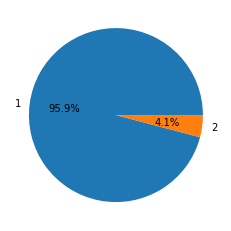

In [93]:
plt.pie(df_count["Count"].value_counts(), labels = [1, 2], autopct='%1.1f%%')
plt.plot()

## Number of songs in top 100 per artist (if a song is twice, is counted twice)

In [75]:
df_songCounts = df.groupby("Artist").Song.count()
df_rndArtist = df_songCounts.to_frame().reset_index().groupby("Song").agg(list)
df_rndArtist["Artist"] = df_rndArtist["Artist"].apply(lambda a : np.random.choice(a, 1)[0])

df_labels = pd.DataFrame(range(1, df_songCounts.max() + 1), columns = ["Song"])
df_labels["Artist"] = ""
df_labels = df_labels.set_index("Song")
df_labels.update(df_rndArtist)

[]

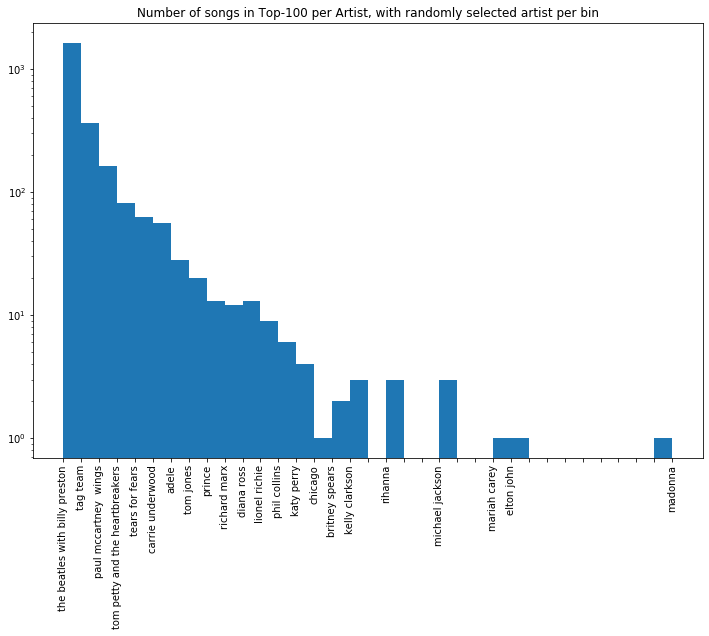

In [91]:
bins = range(1, df_songCounts.max() + 1)
plt.figure(figsize=(12,8))
plt.hist(df_songCounts, bins = bins)
plt.xticks(bins, df_labels["Artist"], rotation='vertical')
plt.yscale("log")
plt.title("Number of songs in Top-100 per Artist, with randomly selected artist per bin")
plt.plot()